# 第30章: 正規分布と確率の基礎

## 📋 この章で学ぶこと

この章を終えると、以下ができるようになります：

- [ ] 確率変数と確率分布の概念を理解できる
- [ ] 正規分布の確率密度関数を説明できる
- [ ] 期待値と分散を計算できる
- [ ] 中心極限定理を実験で確認できる
- [ ] Pythonで正規分布を扱えるようになる

## 🎯 前提知識

この章を学ぶには以下の知識が必要です：

- ✅ Pythonプログラミングの基礎
- ✅ NumPy、Matplotlibの基本的な使い方
- ✅ 基礎的な数学（微分、積分の概念）

⏱️ **推定学習時間**: 120-150分  
📊 **難易度**: ★★☆☆☆（初級）  
🎓 **カテゴリ**: 基礎

---

## 🌟 はじめに

生成AIや拡散モデルを理解するためには、まず**確率**と**正規分布（ガウス分布）**の基礎を固める必要があります。

なぜでしょうか？

拡散モデルの核心は、「データにノイズを加えて純粋なノイズにする」→「そのノイズからデータを復元する方法を学習する」というプロセスです。このノイズは**正規分布**からサンプリングされます。

また、VAE（変分オートエンコーダ）や多くの生成モデルは、**確率分布**をモデル化することで新しいデータを生成します。

このノートブックでは、確率の基礎から始めて、正規分布の性質を深く理解していきます。

In [1]:
# ============================================================
# 環境設定
# 必要なライブラリをインポートし、グラフの表示設定を行います
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# 警告を非表示
warnings.filterwarnings('ignore')

# グラフスタイルの設定
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 日本語フォント設定
import matplotlib.font_manager as fm

def setup_japanese_font():
    """日本語フォントを設定する"""
    japanese_fonts = [
        'Hiragino Sans', 'Hiragino Maru Gothic Pro', 'AppleGothic',  # macOS
        'Yu Gothic', 'MS Gothic',  # Windows
        'Noto Sans CJK JP', 'IPAexGothic', 'TakaoPGothic',  # Linux
    ]
    available_fonts = set(f.name for f in fm.fontManager.ttflist)
    for font in japanese_fonts:
        if font in available_fonts:
            plt.rcParams['font.family'] = font
            plt.rcParams['axes.unicode_minus'] = False
            return font
    return None

font_used = setup_japanese_font()
if font_used:
    print(f"日本語フォント: {font_used}")

# 再現性のための乱数シード
np.random.seed(42)

print("✅ ライブラリのインポート完了")

日本語フォント: Hiragino Sans
✅ ライブラリのインポート完了


---

## 1. 確率の基礎

### 🤔 なぜ確率が必要なのか？

機械学習で扱うデータには、必ず**不確実性**（ランダム性）が含まれています：

- 同じ条件でも測定結果が微妙に異なる（測定誤差）
- データが限られているため、真の値を正確に知ることができない
- 本質的にランダムな現象（量子力学的効果など）

確率論は、この不確実性を**数学的に扱う**ための強力なフレームワークです。

### 📊 確率変数とは？

**確率変数（Random Variable）** は、ランダムな現象の結果を数値で表したものです。

例えば：
- サイコロを振ったときの目 → 1, 2, 3, 4, 5, 6
- 明日の気温 → 連続的な値
- ある人の身長 → 連続的な値

確率変数には2種類あります：

| 種類 | 説明 | 例 |
|------|------|----|
| **離散型** | とびとびの値をとる | サイコロの目、コインの裏表 |
| **連続型** | 連続的な値をとる | 身長、体重、気温 |

サイコロのシミュレーション結果
目 1: 181回 (0.181)  理論値: 0.167
目 2: 164回 (0.164)  理論値: 0.167
目 3: 154回 (0.154)  理論値: 0.167
目 4: 174回 (0.174)  理論値: 0.167
目 5: 172回 (0.172)  理論値: 0.167
目 6: 155回 (0.155)  理論値: 0.167


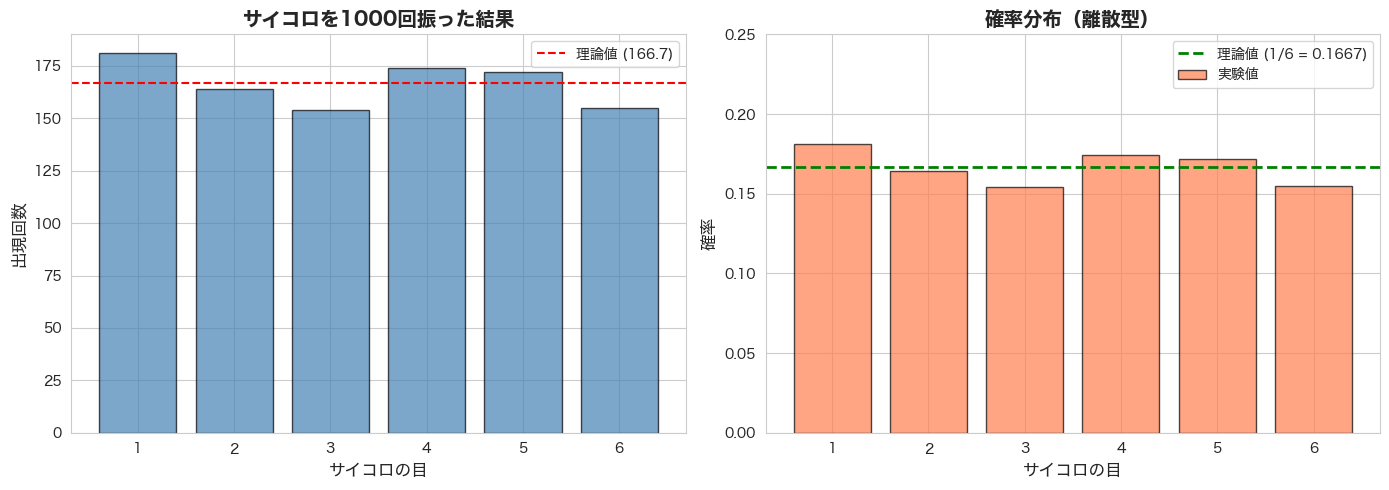


💡 ポイント: 試行回数が増えると、実験値は理論値に近づきます（大数の法則）


In [2]:
# ============================================================
# 離散型確率変数の例: サイコロ
# サイコロを1000回振って、各目が出る確率を確認します
# ============================================================

# サイコロを1000回振るシミュレーション
n_rolls = 1000
dice_rolls = np.random.randint(1, 7, size=n_rolls)  # 1から6の整数をランダムに生成

# 各目が出た回数をカウント
unique, counts = np.unique(dice_rolls, return_counts=True)

# 結果を表示
print("="*50)
print("サイコロのシミュレーション結果")
print("="*50)
for u, c in zip(unique, counts):
    # 確率 = 出た回数 / 全試行回数
    prob = c / n_rolls
    print(f"目 {u}: {c}回 ({prob:.3f})  理論値: {1/6:.3f}")

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: ヒストグラム
axes[0].bar(unique, counts, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axhline(y=n_rolls/6, color='red', linestyle='--', label=f'理論値 ({n_rolls/6:.1f})')
axes[0].set_xlabel('サイコロの目', fontsize=12)
axes[0].set_ylabel('出現回数', fontsize=12)
axes[0].set_title('サイコロを1000回振った結果', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].set_xticks(unique)

# 右: 確率分布
probs = counts / n_rolls
axes[1].bar(unique, probs, color='coral', edgecolor='black', alpha=0.7, label='実験値')
axes[1].axhline(y=1/6, color='green', linestyle='--', linewidth=2, label=f'理論値 (1/6 = {1/6:.4f})')
axes[1].set_xlabel('サイコロの目', fontsize=12)
axes[1].set_ylabel('確率', fontsize=12)
axes[1].set_title('確率分布（離散型）', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].set_xticks(unique)
axes[1].set_ylim(0, 0.25)

plt.tight_layout()
plt.show()

print("\n💡 ポイント: 試行回数が増えると、実験値は理論値に近づきます（大数の法則）")

### 📊 確率分布とは？

**確率分布（Probability Distribution）** は、確率変数がどのような値をとりやすいかを示す関数です。

#### 離散型の場合: 確率質量関数（PMF）

離散型確率変数 $X$ に対して、確率質量関数 $P(X = x)$ は：

$$P(X = x) \geq 0 \quad \text{（非負性）}$$

$$\sum_{x} P(X = x) = 1 \quad \text{（総和が1）}$$

#### 連続型の場合: 確率密度関数（PDF）

連続型確率変数 $X$ に対して、確率密度関数 $p(x)$ は：

$$p(x) \geq 0 \quad \text{（非負性）}$$

$$\int_{-\infty}^{\infty} p(x) dx = 1 \quad \text{（積分が1）}$$

連続型では、**特定の点での確率は0**です。代わりに、区間での確率を計算します：

$$P(a \leq X \leq b) = \int_a^b p(x) dx$$

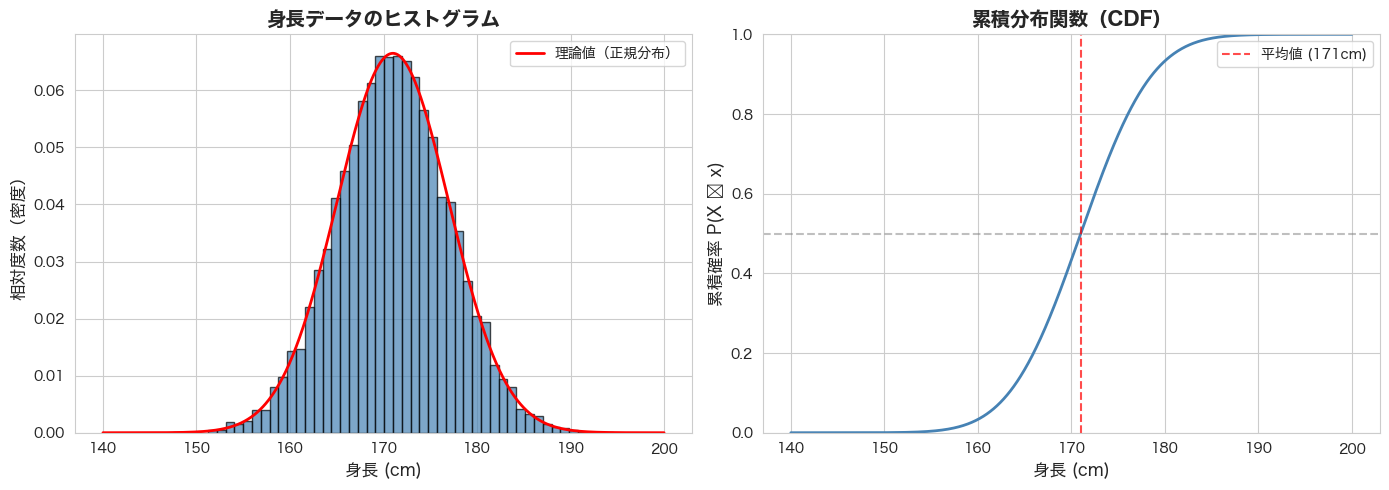

確率計算の例
身長が175cm以上である確率: 0.2525 (25.25%)
身長が165cm〜177cmの間である確率: 0.6827 (68.27%)


In [3]:
# ============================================================
# 連続型確率変数の例: 身長データ
# 架空の身長データを生成して確率密度関数を可視化します
# ============================================================

# 日本人男性の身長データをシミュレーション
# 平均: 171cm, 標準偏差: 6cm と仮定
mean_height = 171
std_height = 6
n_samples = 10000

# 正規分布から身長データをサンプリング
heights = np.random.normal(mean_height, std_height, n_samples)

# 可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: ヒストグラム（相対度数）
axes[0].hist(heights, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('身長 (cm)', fontsize=12)
axes[0].set_ylabel('相対度数（密度）', fontsize=12)
axes[0].set_title('身長データのヒストグラム', fontsize=14, fontweight='bold')

# 理論的な確率密度関数を重ねて描画
x = np.linspace(140, 200, 1000)
pdf = stats.norm.pdf(x, mean_height, std_height)
axes[0].plot(x, pdf, 'r-', linewidth=2, label='理論値（正規分布）')
axes[0].legend()

# 右: 累積分布関数（CDF）
# ある値以下である確率を示す
cdf = stats.norm.cdf(x, mean_height, std_height)
axes[1].plot(x, cdf, 'steelblue', linewidth=2)
axes[1].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
axes[1].axvline(x=mean_height, color='red', linestyle='--', alpha=0.7, label=f'平均値 ({mean_height}cm)')
axes[1].set_xlabel('身長 (cm)', fontsize=12)
axes[1].set_ylabel('累積確率 P(X ≤ x)', fontsize=12)
axes[1].set_title('累積分布関数（CDF）', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# 確率の計算例
print("="*60)
print("確率計算の例")
print("="*60)

# 175cm以上である確率
prob_above_175 = 1 - stats.norm.cdf(175, mean_height, std_height)
print(f"身長が175cm以上である確率: {prob_above_175:.4f} ({prob_above_175*100:.2f}%)")

# 165cmから177cmの間である確率
prob_between = stats.norm.cdf(177, mean_height, std_height) - stats.norm.cdf(165, mean_height, std_height)
print(f"身長が165cm〜177cmの間である確率: {prob_between:.4f} ({prob_between*100:.2f}%)")

---

## 2. 期待値と分散

### 🤔 なぜ期待値と分散が重要なのか？

確率分布を特徴づける最も基本的な量は、**期待値**（平均）と**分散**です。

- **期待値**: 分布の「中心」を表す
- **分散**: 分布の「ばらつき」を表す

この2つの値だけで、分布の大まかな形を把握できます。

### 📊 期待値（Expected Value）

期待値は、確率変数の「平均的な値」を表します。

**離散型の場合:**
$$E[X] = \mu = \sum_{x} x \cdot P(X = x)$$

**連続型の場合:**
$$E[X] = \mu = \int_{-\infty}^{\infty} x \cdot p(x) dx$$

### 📊 分散（Variance）

分散は、「期待値からのずれの2乗の期待値」です。

$$\text{Var}(X) = \sigma^2 = E[(X - \mu)^2] = E[X^2] - (E[X])^2$$

**標準偏差** は分散の平方根です：$\sigma = \sqrt{\text{Var}(X)}$

In [4]:
# ============================================================
# 期待値と分散の計算例
# サイコロと身長データで期待値と分散を計算します
# ============================================================

print("="*60)
print("期待値と分散の計算")
print("="*60)

# サイコロの理論的な期待値と分散
print("\n【サイコロの場合】")
dice_values = np.array([1, 2, 3, 4, 5, 6])
dice_probs = np.array([1/6] * 6)

# 期待値: E[X] = Σ x * P(x)
expected_dice = np.sum(dice_values * dice_probs)
print(f"期待値 E[X] = 1×(1/6) + 2×(1/6) + ... + 6×(1/6) = {expected_dice:.4f}")

# 分散: Var(X) = E[X^2] - (E[X])^2
expected_x2 = np.sum(dice_values**2 * dice_probs)
variance_dice = expected_x2 - expected_dice**2
print(f"分散 Var(X) = E[X²] - (E[X])² = {expected_x2:.4f} - {expected_dice**2:.4f} = {variance_dice:.4f}")
print(f"標準偏差 σ = √Var(X) = {np.sqrt(variance_dice):.4f}")

# シミュレーションとの比較
print(f"\nシミュレーション結果（{n_rolls}回）:")
print(f"  サンプル平均: {np.mean(dice_rolls):.4f}")
print(f"  サンプル分散: {np.var(dice_rolls):.4f}")

# 身長データの場合
print("\n【身長データの場合】")
print(f"設定値: 平均={mean_height}cm, 標準偏差={std_height}cm")
print(f"シミュレーション結果（{n_samples}サンプル）:")
print(f"  サンプル平均: {np.mean(heights):.4f}cm")
print(f"  サンプル標準偏差: {np.std(heights):.4f}cm")

期待値と分散の計算

【サイコロの場合】
期待値 E[X] = 1×(1/6) + 2×(1/6) + ... + 6×(1/6) = 3.5000
分散 Var(X) = E[X²] - (E[X])² = 15.1667 - 12.2500 = 2.9167
標準偏差 σ = √Var(X) = 1.7078

シミュレーション結果（1000回）:
  サンプル平均: 3.4570
  サンプル分散: 2.9362

【身長データの場合】
設定値: 平均=171cm, 標準偏差=6cm
シミュレーション結果（10000サンプル）:
  サンプル平均: 170.9849cm
  サンプル標準偏差: 6.0113cm


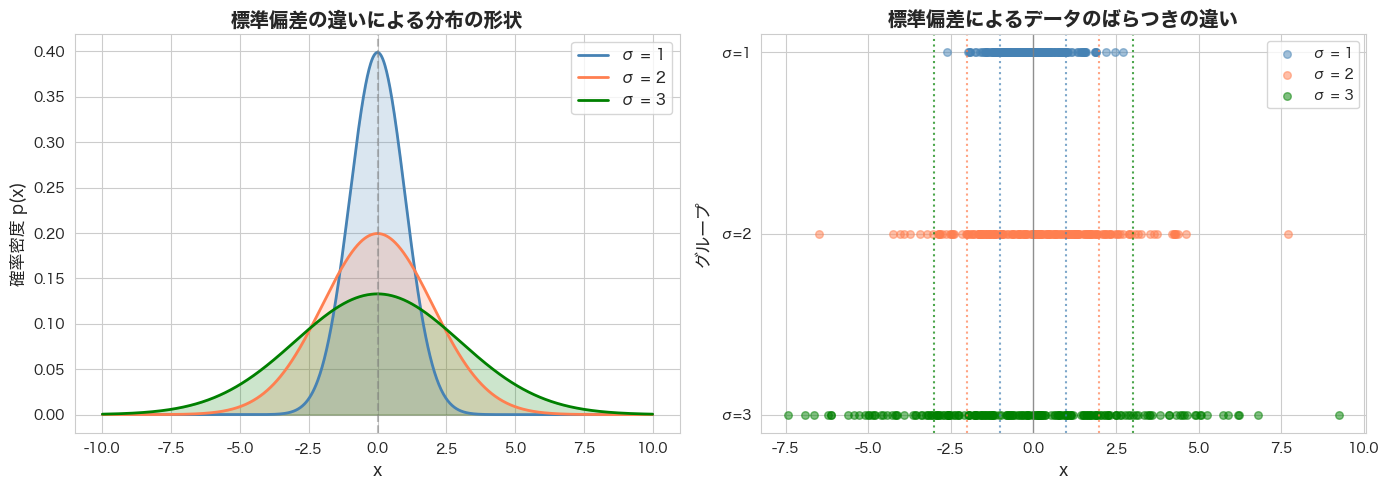

💡 ポイント: 標準偏差が大きいほど、データは平均から離れた値をとりやすくなります


In [5]:
# ============================================================
# 分散の視覚的理解
# 分散が大きいほど、データのばらつきが大きいことを可視化します
# ============================================================

# 異なる標準偏差を持つ正規分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: 3つの正規分布（同じ平均、異なる分散）
x = np.linspace(-10, 10, 1000)
stds = [1, 2, 3]
colors = ['steelblue', 'coral', 'green']

for std, color in zip(stds, colors):
    pdf = stats.norm.pdf(x, 0, std)
    axes[0].plot(x, pdf, color=color, linewidth=2, label=f'σ = {std}')
    axes[0].fill_between(x, pdf, alpha=0.2, color=color)

axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('確率密度 p(x)', fontsize=12)
axes[0].set_title('標準偏差の違いによる分布の形状', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].axvline(x=0, color='gray', linestyle='--', alpha=0.5)

# 右: サンプルデータの散布図
np.random.seed(42)
n = 200
for i, (std, color) in enumerate(zip(stds, colors)):
    samples = np.random.normal(0, std, n)
    y_offset = 3 - i  # 縦方向にずらして表示
    axes[1].scatter(samples, [y_offset]*n, alpha=0.5, s=30, color=color, label=f'σ = {std}')
    # 平均と±1σの範囲を表示
    axes[1].axvline(x=-std, color=color, linestyle=':', alpha=0.7)
    axes[1].axvline(x=std, color=color, linestyle=':', alpha=0.7)

axes[1].axvline(x=0, color='gray', linestyle='-', alpha=0.8, linewidth=1)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('グループ', fontsize=12)
axes[1].set_title('標準偏差によるデータのばらつきの違い', fontsize=14, fontweight='bold')
axes[1].set_yticks([1, 2, 3])
axes[1].set_yticklabels(['σ=3', 'σ=2', 'σ=1'])
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

print("💡 ポイント: 標準偏差が大きいほど、データは平均から離れた値をとりやすくなります")

---

## 3. 正規分布（ガウス分布）

### 🤔 なぜ正規分布が特別なのか？

正規分布は、以下の理由で特に重要です：

1. **自然界での普遍性**: 身長、測定誤差、株価変動など、多くの自然現象は正規分布に従う
2. **中心極限定理**: 多くの確率変数の和は、正規分布に近づく
3. **数学的な扱いやすさ**: 閉形式の解が得られることが多い
4. **機械学習での重要性**: VAE、拡散モデルなど多くの生成モデルで使用

### 📊 正規分布の確率密度関数

正規分布 $\mathcal{N}(\mu, \sigma^2)$ の確率密度関数は：

$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

ここで：
- $\mu$: 平均（分布の中心）
- $\sigma^2$: 分散（分布の広がり）
- $\sigma$: 標準偏差

### 📊 標準正規分布

特に $\mu = 0$、$\sigma = 1$ の場合を**標準正規分布** $\mathcal{N}(0, 1)$ と呼びます：

$$p(x) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right)$$

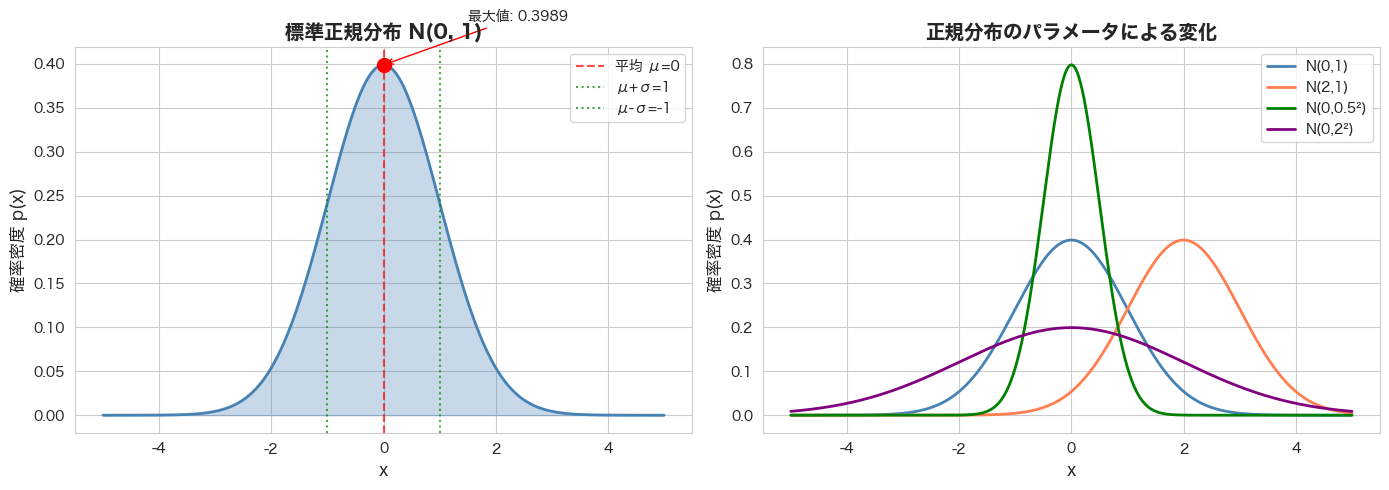

💡 ポイント:
  - μを変えると分布が左右に移動します
  - σを大きくすると分布が広がり、高さが低くなります
  - 面積（確率の総和）は常に1です


In [6]:
# ============================================================
# 正規分布の確率密度関数を可視化
# 数式の各部分がどのような役割を持つか理解します
# ============================================================

def normal_pdf(x, mu, sigma):
    """
    正規分布の確率密度関数を計算する
    
    Parameters:
    -----------
    x : array-like
        確率変数の値
    mu : float
        平均
    sigma : float
        標準偏差
    
    Returns:
    --------
    array-like
        確率密度
    """
    # 正規化定数
    normalization = 1 / np.sqrt(2 * np.pi * sigma**2)
    
    # 指数部分
    exponent = -((x - mu)**2) / (2 * sigma**2)
    
    return normalization * np.exp(exponent)

# 標準正規分布の可視化
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-5, 5, 1000)

# 左: 標準正規分布
pdf_standard = normal_pdf(x, 0, 1)
axes[0].plot(x, pdf_standard, 'steelblue', linewidth=2)
axes[0].fill_between(x, pdf_standard, alpha=0.3, color='steelblue')

# 重要な点を強調
axes[0].axvline(x=0, color='red', linestyle='--', alpha=0.7, label='平均 μ=0')
axes[0].axvline(x=1, color='green', linestyle=':', alpha=0.7, label='μ+σ=1')
axes[0].axvline(x=-1, color='green', linestyle=':', alpha=0.7, label='μ-σ=-1')

# 確率密度の最大値をマーク
max_pdf = normal_pdf(0, 0, 1)
axes[0].scatter([0], [max_pdf], color='red', s=100, zorder=5)
axes[0].annotate(f'最大値: {max_pdf:.4f}', xy=(0, max_pdf), xytext=(1.5, max_pdf+0.05),
                fontsize=10, arrowprops=dict(arrowstyle='->', color='red'))

axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('確率密度 p(x)', fontsize=12)
axes[0].set_title('標準正規分布 N(0, 1)', fontsize=14, fontweight='bold')
axes[0].legend()

# 右: パラメータの影響
params = [(0, 1, 'N(0,1)'), (2, 1, 'N(2,1)'), (0, 0.5, 'N(0,0.5²)'), (0, 2, 'N(0,2²)')]
colors = ['steelblue', 'coral', 'green', 'purple']

for (mu, sigma, label), color in zip(params, colors):
    pdf = normal_pdf(x, mu, sigma)
    axes[1].plot(x, pdf, color=color, linewidth=2, label=label)

axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('確率密度 p(x)', fontsize=12)
axes[1].set_title('正規分布のパラメータによる変化', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

print("💡 ポイント:")
print("  - μを変えると分布が左右に移動します")
print("  - σを大きくすると分布が広がり、高さが低くなります")
print("  - 面積（確率の総和）は常に1です")

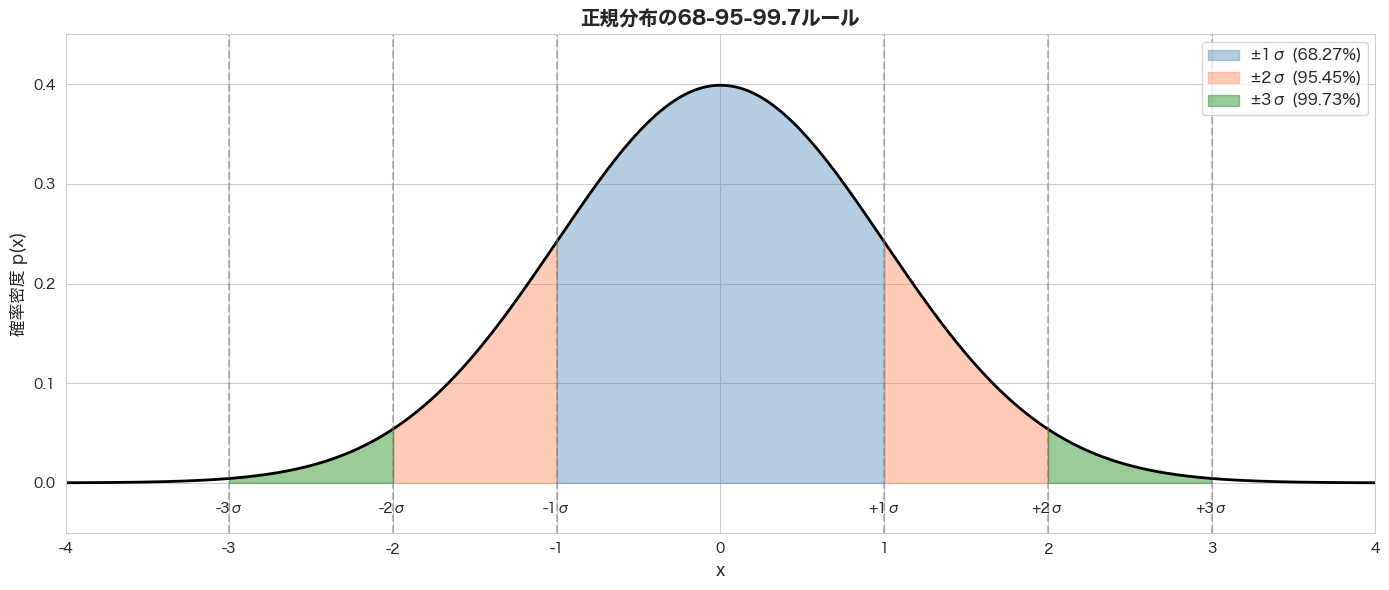

68-95-99.7ルールの確認
±1σ の範囲に含まれる確率: 68.27%
±2σ の範囲に含まれる確率: 95.45%
±3σ の範囲に含まれる確率: 99.73%

💡 このルールは、データの異常値検出などに役立ちます
   3σを超えるデータは、約0.27%（1000件中約3件）しか発生しないはずです


In [7]:
# ============================================================
# 正規分布の重要な性質
# 68-95-99.7ルール（経験則）を確認します
# ============================================================

fig, ax = plt.subplots(figsize=(14, 6))

x = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(x, 0, 1)

# 基本の分布を描画
ax.plot(x, pdf, 'k-', linewidth=2)

# 各範囲を色分け
# ±1σ (68.27%)
x1 = np.linspace(-1, 1, 100)
ax.fill_between(x1, stats.norm.pdf(x1, 0, 1), alpha=0.4, color='steelblue', label='±1σ (68.27%)')

# ±2σ (95.45%)
x2_left = np.linspace(-2, -1, 50)
x2_right = np.linspace(1, 2, 50)
ax.fill_between(x2_left, stats.norm.pdf(x2_left, 0, 1), alpha=0.4, color='coral', label='±2σ (95.45%)')
ax.fill_between(x2_right, stats.norm.pdf(x2_right, 0, 1), alpha=0.4, color='coral')

# ±3σ (99.73%)
x3_left = np.linspace(-3, -2, 50)
x3_right = np.linspace(2, 3, 50)
ax.fill_between(x3_left, stats.norm.pdf(x3_left, 0, 1), alpha=0.4, color='green', label='±3σ (99.73%)')
ax.fill_between(x3_right, stats.norm.pdf(x3_right, 0, 1), alpha=0.4, color='green')

# 縦線
for i in range(1, 4):
    ax.axvline(x=i, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=-i, color='gray', linestyle='--', alpha=0.5)
    ax.text(i, -0.03, f'+{i}σ', ha='center', fontsize=10)
    ax.text(-i, -0.03, f'-{i}σ', ha='center', fontsize=10)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('確率密度 p(x)', fontsize=12)
ax.set_title('正規分布の68-95-99.7ルール', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.set_xlim(-4, 4)
ax.set_ylim(-0.05, 0.45)

plt.tight_layout()
plt.show()

# 確率の計算で確認
print("="*60)
print("68-95-99.7ルールの確認")
print("="*60)

for n_sigma in [1, 2, 3]:
    prob = stats.norm.cdf(n_sigma) - stats.norm.cdf(-n_sigma)
    print(f"±{n_sigma}σ の範囲に含まれる確率: {prob*100:.2f}%")

print("\n💡 このルールは、データの異常値検出などに役立ちます")
print("   3σを超えるデータは、約0.27%（1000件中約3件）しか発生しないはずです")

---

## 4. 正規分布からのサンプリング

### 🤔 なぜサンプリングが重要なのか？

生成モデルでは、確率分布から**サンプルを生成**することが核心的な操作です：

- VAE: 潜在空間から正規分布でサンプリング
- 拡散モデル: 純粋なノイズ（正規分布）からスタートして、徐々にデータを生成

Pythonでは、`numpy.random.normal()` や `scipy.stats.norm.rvs()` を使ってサンプリングできます。

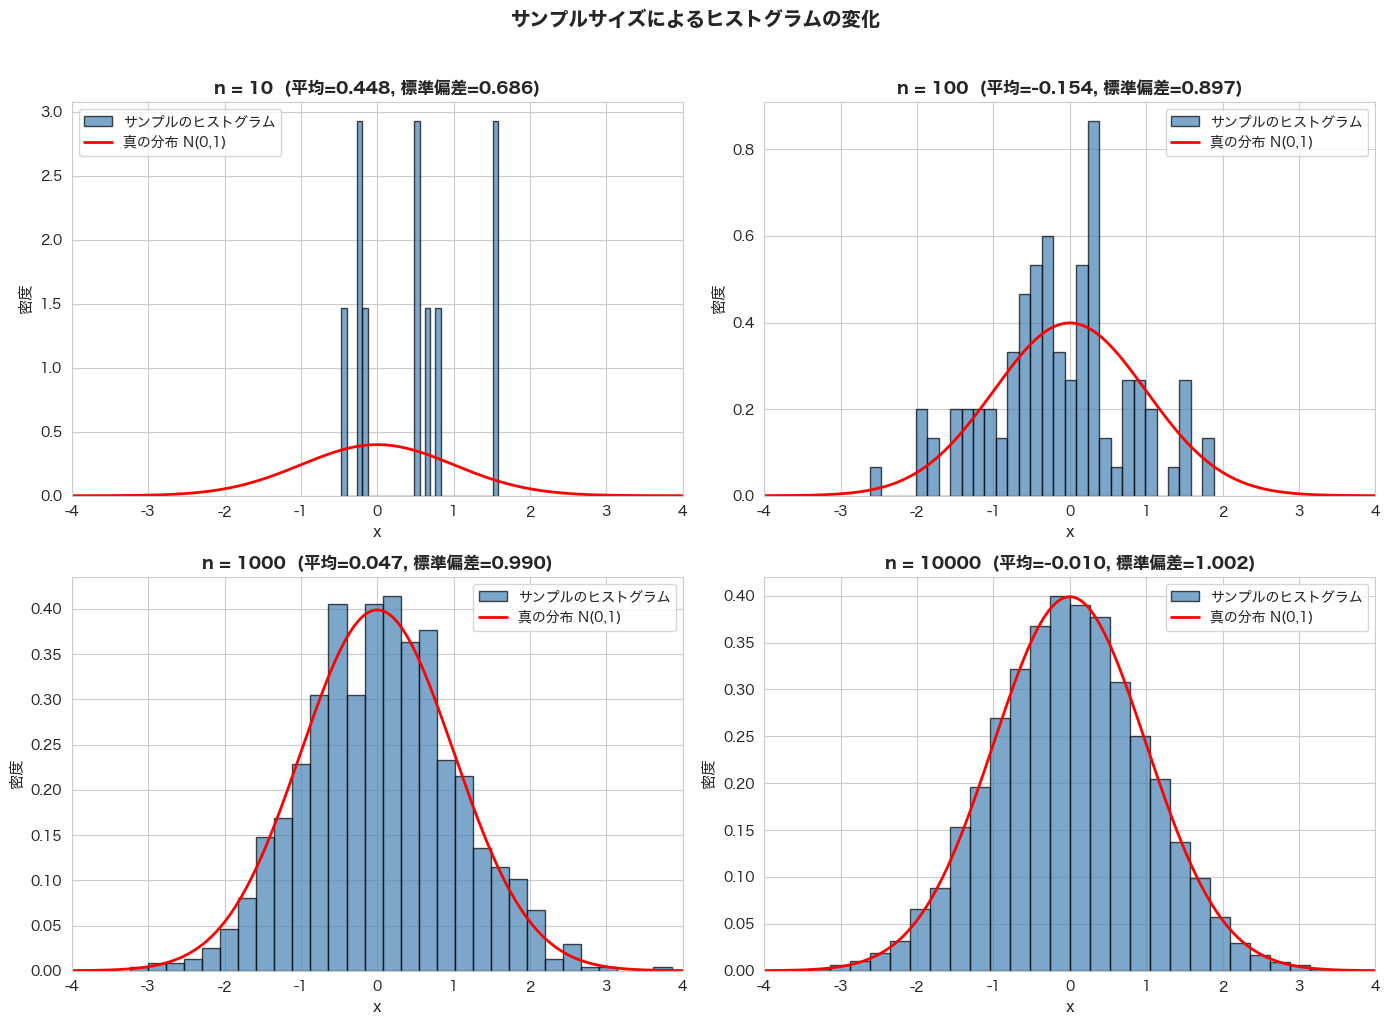

💡 ポイント: サンプルサイズが大きくなるほど、ヒストグラムは真の分布に近づきます
   これは大数の法則に基づいています


In [8]:
# ============================================================
# 正規分布からのサンプリング
# 様々なサンプルサイズでサンプリングし、分布との比較を行います
# ============================================================

np.random.seed(42)

# 異なるサンプルサイズでサンプリング
sample_sizes = [10, 100, 1000, 10000]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

x = np.linspace(-4, 4, 1000)
true_pdf = stats.norm.pdf(x, 0, 1)

for ax, n in zip(axes, sample_sizes):
    # 標準正規分布からサンプリング
    samples = np.random.normal(0, 1, n)
    
    # ヒストグラムを描画
    ax.hist(samples, bins=30, density=True, alpha=0.7, color='steelblue', 
            edgecolor='black', label='サンプルのヒストグラム')
    
    # 真の分布を重ねて描画
    ax.plot(x, true_pdf, 'r-', linewidth=2, label='真の分布 N(0,1)')
    
    # サンプル統計量を計算
    sample_mean = np.mean(samples)
    sample_std = np.std(samples)
    
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('密度', fontsize=11)
    ax.set_title(f'n = {n}  (平均={sample_mean:.3f}, 標準偏差={sample_std:.3f})', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)
    ax.set_xlim(-4, 4)

plt.suptitle('サンプルサイズによるヒストグラムの変化', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 ポイント: サンプルサイズが大きくなるほど、ヒストグラムは真の分布に近づきます")
print("   これは大数の法則に基づいています")

In [9]:
# ============================================================
# scipyを使ったサンプリングの方法
# scipy.statsモジュールの便利な機能を紹介します
# ============================================================

# 正規分布オブジェクトを作成
normal_dist = stats.norm(loc=5, scale=2)  # 平均5, 標準偏差2

print("="*60)
print("scipy.statsを使った正規分布の操作")
print("="*60)

# 1. サンプリング (rvs: random variates)
samples = normal_dist.rvs(size=5)
print(f"\n1. サンプリング（5つ）: {samples}")

# 2. 確率密度関数 (pdf)
x_val = 5
pdf_val = normal_dist.pdf(x_val)
print(f"\n2. x={x_val}での確率密度: {pdf_val:.4f}")

# 3. 累積分布関数 (cdf)
cdf_val = normal_dist.cdf(x_val)
print(f"\n3. P(X ≤ {x_val}): {cdf_val:.4f}")

# 4. パーセント点関数 (ppf: percent point function) - cdfの逆関数
percentile_95 = normal_dist.ppf(0.95)
print(f"\n4. 95パーセンタイル点: {percentile_95:.4f}")

# 5. 統計量
mean, var, skew, kurt = normal_dist.stats(moments='mvsk')
print(f"\n5. 統計量:")
print(f"   平均: {mean:.4f}")
print(f"   分散: {var:.4f}")
print(f"   歪度: {skew:.4f}")
print(f"   尖度: {kurt:.4f}")

# 6. 信頼区間
lower, upper = normal_dist.interval(0.95)  # 95%信頼区間
print(f"\n6. 95%信頼区間: [{lower:.4f}, {upper:.4f}]")

scipy.statsを使った正規分布の操作

1. サンプリング（5つ）: [3.29676552 6.93225065 5.06572675 4.2344432  4.76702329]

2. x=5での確率密度: 0.1995

3. P(X ≤ 5): 0.5000

4. 95パーセンタイル点: 8.2897

5. 統計量:
   平均: 5.0000
   分散: 4.0000
   歪度: 0.0000
   尖度: 0.0000

6. 95%信頼区間: [1.0801, 8.9199]


---

## 5. 中心極限定理

### 🤔 中心極限定理とは？

**中心極限定理（Central Limit Theorem, CLT）** は、統計学で最も重要な定理の1つです：

> 独立で同一の分布に従う確率変数 $X_1, X_2, ..., X_n$ の**和**（または平均）は、
> $n$ が十分大きいとき、元の分布に関わらず**正規分布に近づく**。

数学的に表現すると：

$$\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \xrightarrow{d} \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$$

### 🤔 なぜこれが重要なのか？

1. **正規分布の普遍性**: 多くの自然現象が正規分布に従う理由を説明
2. **統計的推論の基礎**: 標本平均の分布が分かるので、仮説検定や信頼区間の計算が可能
3. **機械学習での応用**: バッチ正規化、重みの初期化など

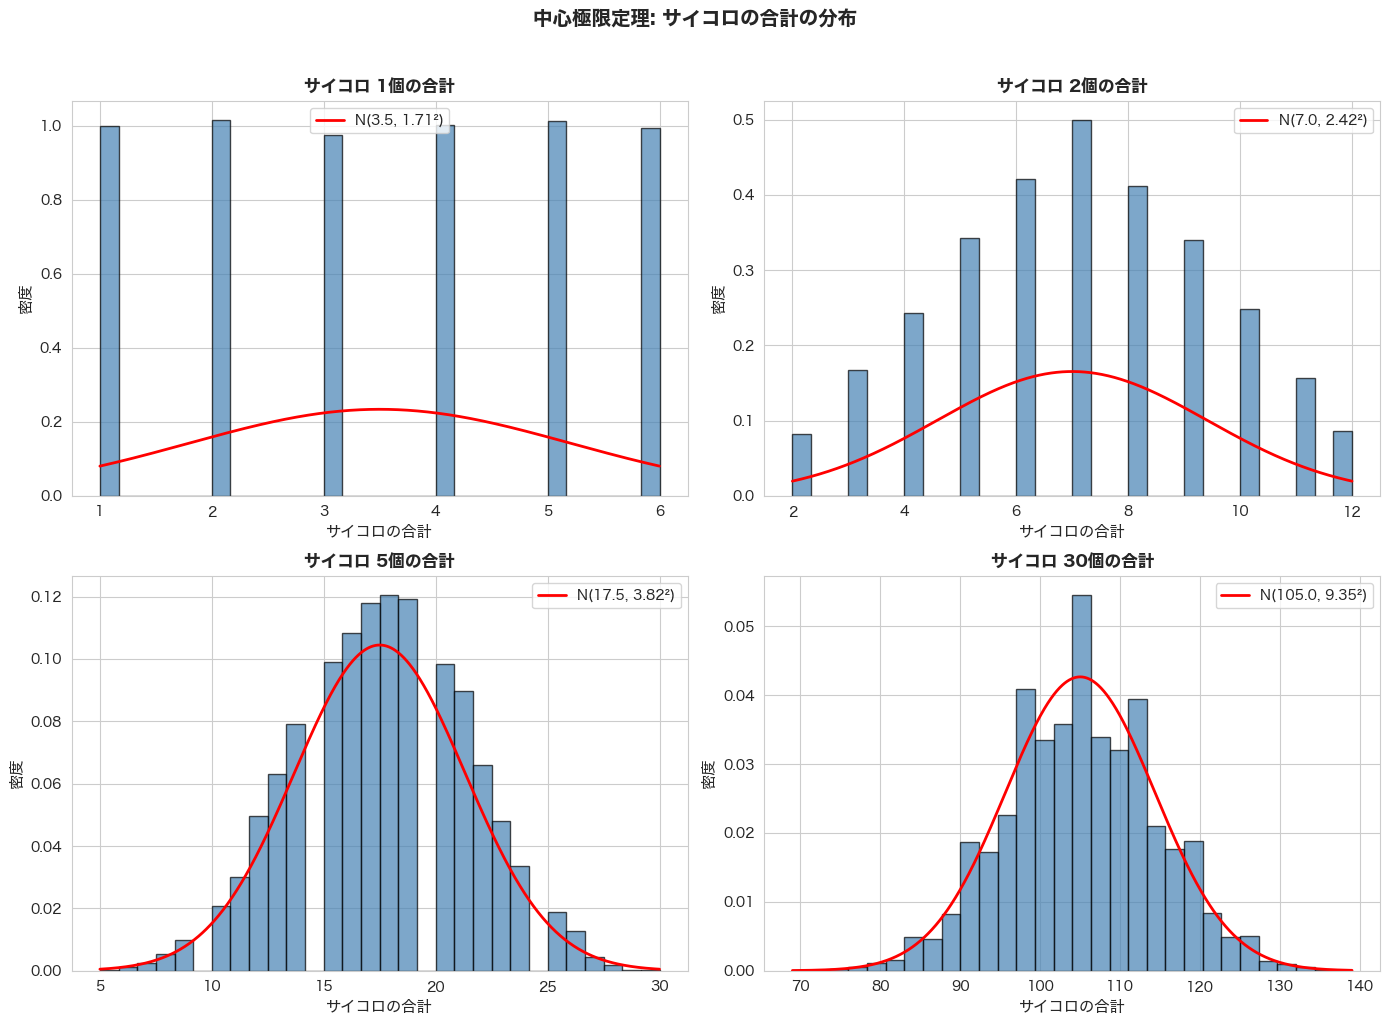

💡 ポイント: サイコロの目は離散一様分布（非正規分布）ですが、
   多くのサイコロの合計は正規分布に近づきます！


In [10]:
# ============================================================
# 中心極限定理の実験1: サイコロの和
# サイコロを複数回振った合計がどのような分布になるか確認します
# ============================================================

np.random.seed(42)

def simulate_dice_sum(n_dice, n_simulations=10000):
    """
    n_dice個のサイコロを振った合計をシミュレーション
    
    Parameters:
    -----------
    n_dice : int
        サイコロの個数
    n_simulations : int
        シミュレーション回数
    
    Returns:
    --------
    array
        各シミュレーションでの合計値
    """
    # 各シミュレーションで n_dice 個のサイコロを振る
    rolls = np.random.randint(1, 7, size=(n_simulations, n_dice))
    # 各シミュレーションでの合計
    return np.sum(rolls, axis=1)

# 異なるサイコロの数でシミュレーション
dice_counts = [1, 2, 5, 30]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, n_dice in zip(axes, dice_counts):
    # サイコロの合計をシミュレーション
    sums = simulate_dice_sum(n_dice)
    
    # ヒストグラム
    ax.hist(sums, bins=30, density=True, alpha=0.7, color='steelblue', edgecolor='black')
    
    # 理論的な正規分布を重ねる
    # サイコロ1個の期待値: 3.5, 分散: 35/12
    theoretical_mean = n_dice * 3.5
    theoretical_std = np.sqrt(n_dice * 35/12)
    
    x = np.linspace(sums.min(), sums.max(), 1000)
    theoretical_pdf = stats.norm.pdf(x, theoretical_mean, theoretical_std)
    ax.plot(x, theoretical_pdf, 'r-', linewidth=2, label=f'N({theoretical_mean:.1f}, {theoretical_std:.2f}²)')
    
    ax.set_xlabel('サイコロの合計', fontsize=11)
    ax.set_ylabel('密度', fontsize=11)
    ax.set_title(f'サイコロ {n_dice}個の合計', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)

plt.suptitle('中心極限定理: サイコロの合計の分布', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 ポイント: サイコロの目は離散一様分布（非正規分布）ですが、")
print("   多くのサイコロの合計は正規分布に近づきます！")

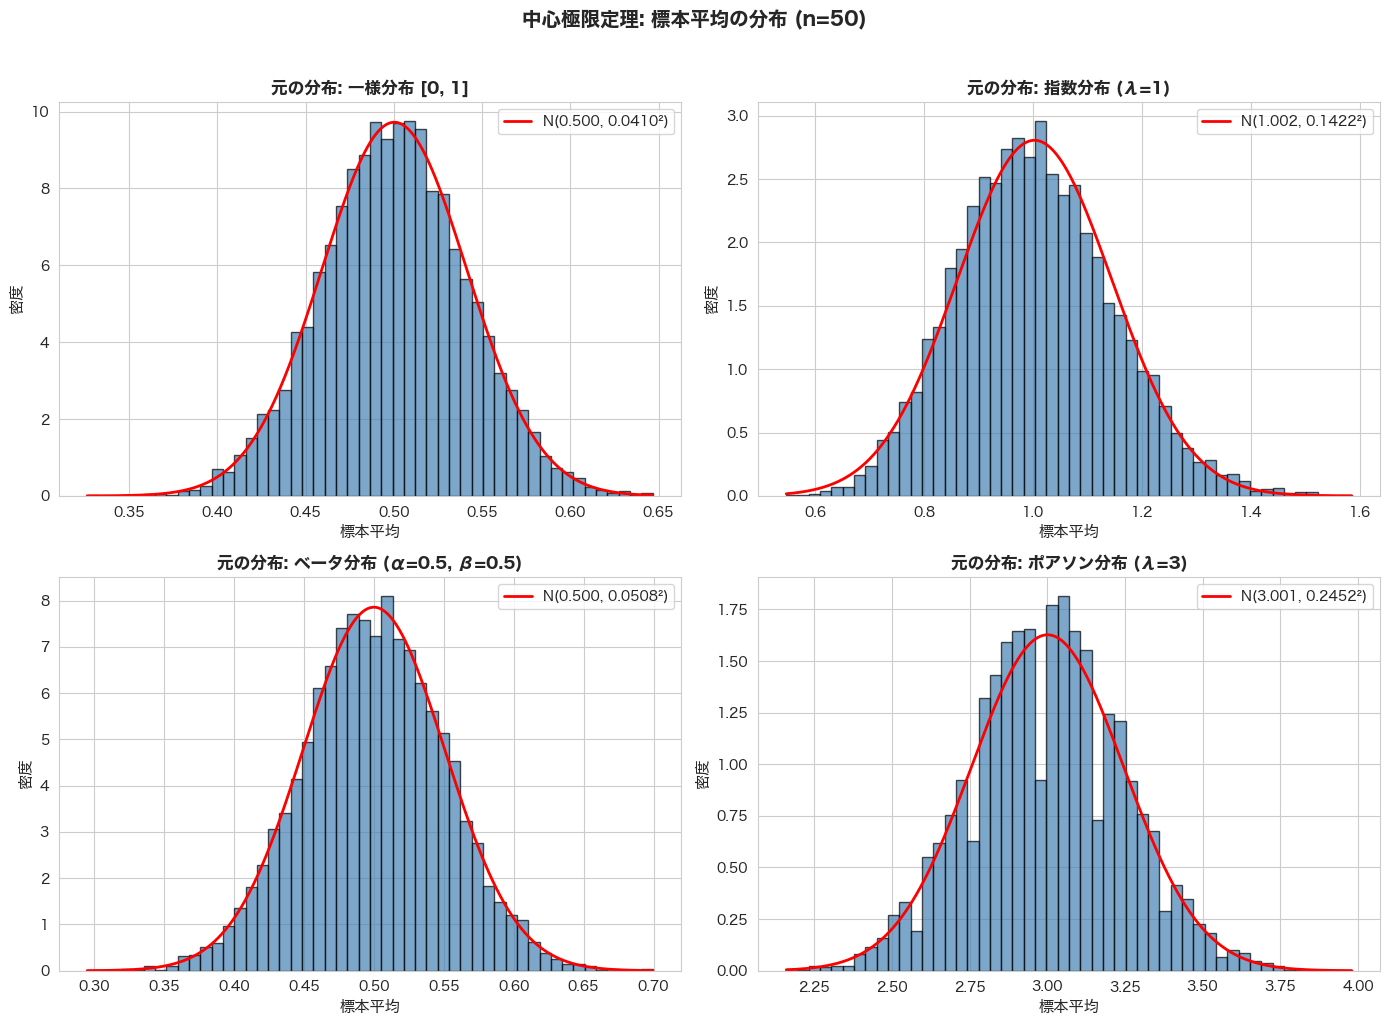

💡 ポイント: 元の分布がどんな形でも、標本平均は正規分布に近づきます
   標本サイズ n=50 でもかなり正規分布に近い形状になっています


In [11]:
# ============================================================
# 中心極限定理の実験2: 様々な分布からの標本平均
# 元の分布が正規分布でなくても、標本平均は正規分布に近づきます
# ============================================================

np.random.seed(42)

def sample_means(dist_func, n_samples, n_means=10000):
    """
    分布からn_samplesずつ取り、平均を計算することをn_means回繰り返す
    """
    means = [np.mean(dist_func(n_samples)) for _ in range(n_means)]
    return np.array(means)

# 様々な分布を定義
distributions = [
    ('一様分布 [0, 1]', lambda n: np.random.uniform(0, 1, n)),
    ('指数分布 (λ=1)', lambda n: np.random.exponential(1, n)),
    ('ベータ分布 (α=0.5, β=0.5)', lambda n: np.random.beta(0.5, 0.5, n)),
    ('ポアソン分布 (λ=3)', lambda n: np.random.poisson(3, n))
]

sample_size = 50  # 各標本のサイズ

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, (name, dist_func) in zip(axes, distributions):
    # 標本平均の分布をシミュレーション
    means = sample_means(dist_func, sample_size)
    
    # ヒストグラム
    ax.hist(means, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
    
    # 正規分布をフィット
    mu_hat = np.mean(means)
    sigma_hat = np.std(means)
    x = np.linspace(means.min(), means.max(), 1000)
    fitted_pdf = stats.norm.pdf(x, mu_hat, sigma_hat)
    ax.plot(x, fitted_pdf, 'r-', linewidth=2, label=f'N({mu_hat:.3f}, {sigma_hat:.4f}²)')
    
    ax.set_xlabel('標本平均', fontsize=11)
    ax.set_ylabel('密度', fontsize=11)
    ax.set_title(f'元の分布: {name}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=10)

plt.suptitle(f'中心極限定理: 標本平均の分布 (n={sample_size})', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 ポイント: 元の分布がどんな形でも、標本平均は正規分布に近づきます")
print(f"   標本サイズ n={sample_size} でもかなり正規分布に近い形状になっています")

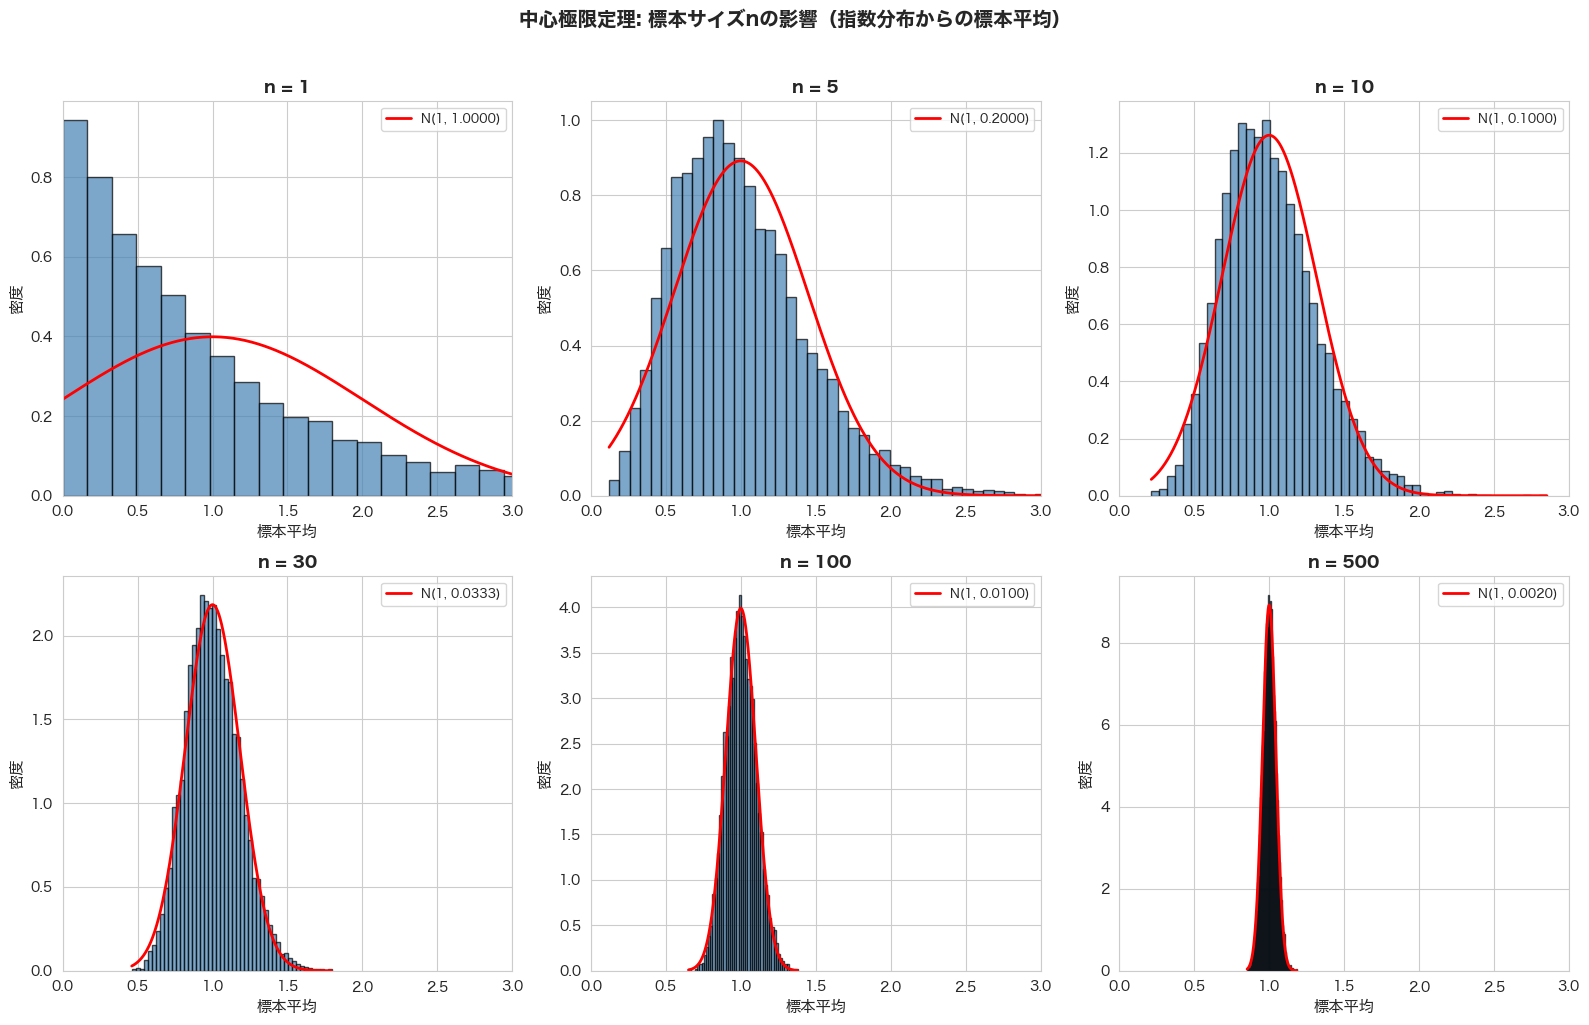

💡 ポイント:
  - n=1では元の指数分布（右に歪んだ分布）のまま
  - nが増えるにつれて正規分布に近づく
  - nが増えると分散が小さくなり、分布が鋭くなる


In [12]:
# ============================================================
# 中心極限定理: 標本サイズnの影響
# nが大きくなるにつれて、標本平均の分布がどう変化するか確認します
# ============================================================

np.random.seed(42)

# 指数分布（非対称な分布）を使用
sample_sizes = [1, 5, 10, 30, 100, 500]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for ax, n in zip(axes, sample_sizes):
    # 指数分布から標本平均を計算（10000回繰り返し）
    n_simulations = 10000
    means = [np.mean(np.random.exponential(1, n)) for _ in range(n_simulations)]
    means = np.array(means)
    
    # ヒストグラム
    ax.hist(means, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
    
    # 理論的な正規分布
    # 指数分布の平均=1, 分散=1 なので、標本平均の分散は 1/n
    theoretical_mean = 1
    theoretical_std = 1 / np.sqrt(n)
    
    x = np.linspace(means.min(), means.max(), 1000)
    theoretical_pdf = stats.norm.pdf(x, theoretical_mean, theoretical_std)
    ax.plot(x, theoretical_pdf, 'r-', linewidth=2, label=f'N(1, {1/n:.4f})')
    
    ax.set_xlabel('標本平均', fontsize=11)
    ax.set_ylabel('密度', fontsize=11)
    ax.set_title(f'n = {n}', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.set_xlim(0, 3)

plt.suptitle('中心極限定理: 標本サイズnの影響（指数分布からの標本平均）', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("💡 ポイント:")
print("  - n=1では元の指数分布（右に歪んだ分布）のまま")
print("  - nが増えるにつれて正規分布に近づく")
print("  - nが増えると分散が小さくなり、分布が鋭くなる")

---

## 6. 正規分布の実世界での応用

### 📊 身長・体重などの自然現象

多くの自然現象は正規分布に従います。これは、多くの独立した要因の和として現象が決まるため、中心極限定理によるものです。

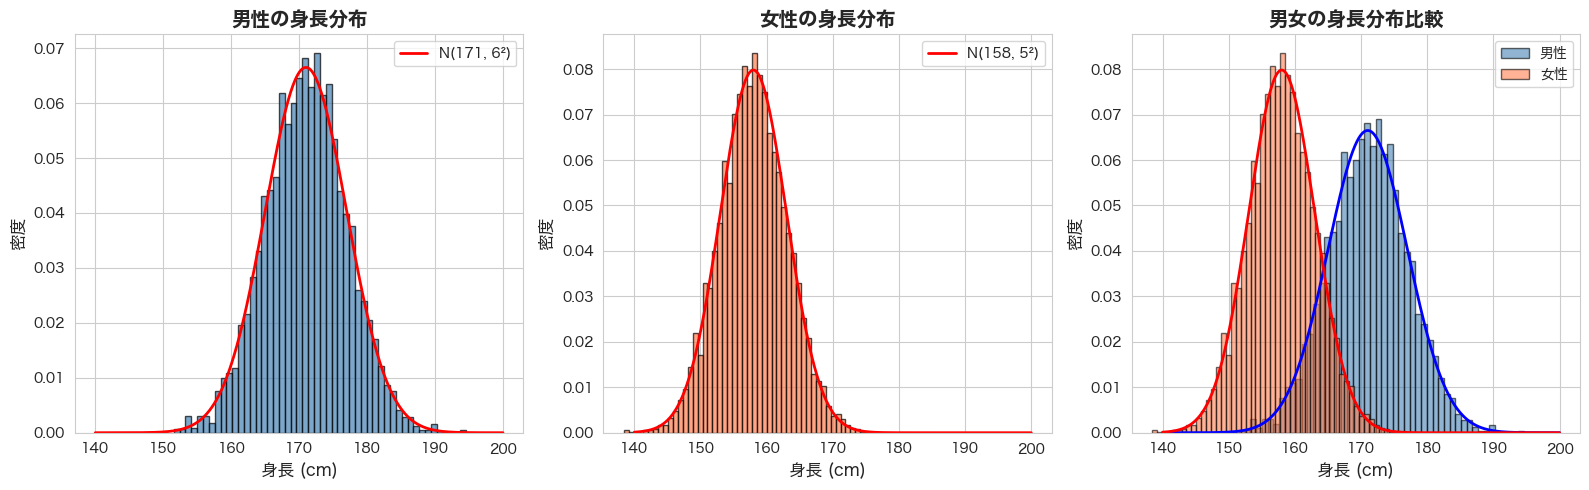

身長データの統計量

男性: 平均=171.03cm, 標準偏差=5.98cm
女性: 平均=157.95cm, 標準偏差=5.05cm


In [13]:
# ============================================================
# 実世界データのシミュレーション: 身長データ
# 身長は多くの遺伝的要因と環境要因の和で決まるため、正規分布に従います
# ============================================================

np.random.seed(42)

# 日本人の身長データをシミュレーション（厚生労働省データを参考）
# 男性: 平均171cm, 標準偏差6cm
# 女性: 平均158cm, 標準偏差5cm

n_samples = 5000

male_heights = np.random.normal(171, 6, n_samples)
female_heights = np.random.normal(158, 5, n_samples)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 男性の身長分布
axes[0].hist(male_heights, bins=50, density=True, alpha=0.7, color='steelblue', edgecolor='black')
x = np.linspace(140, 200, 1000)
axes[0].plot(x, stats.norm.pdf(x, 171, 6), 'r-', linewidth=2, label='N(171, 6²)')
axes[0].set_xlabel('身長 (cm)', fontsize=12)
axes[0].set_ylabel('密度', fontsize=12)
axes[0].set_title('男性の身長分布', fontsize=14, fontweight='bold')
axes[0].legend()

# 女性の身長分布
axes[1].hist(female_heights, bins=50, density=True, alpha=0.7, color='coral', edgecolor='black')
axes[1].plot(x, stats.norm.pdf(x, 158, 5), 'r-', linewidth=2, label='N(158, 5²)')
axes[1].set_xlabel('身長 (cm)', fontsize=12)
axes[1].set_ylabel('密度', fontsize=12)
axes[1].set_title('女性の身長分布', fontsize=14, fontweight='bold')
axes[1].legend()

# 両方を重ねて表示
axes[2].hist(male_heights, bins=50, density=True, alpha=0.6, color='steelblue', 
             edgecolor='black', label='男性')
axes[2].hist(female_heights, bins=50, density=True, alpha=0.6, color='coral', 
             edgecolor='black', label='女性')
axes[2].plot(x, stats.norm.pdf(x, 171, 6), 'b-', linewidth=2)
axes[2].plot(x, stats.norm.pdf(x, 158, 5), 'r-', linewidth=2)
axes[2].set_xlabel('身長 (cm)', fontsize=12)
axes[2].set_ylabel('密度', fontsize=12)
axes[2].set_title('男女の身長分布比較', fontsize=14, fontweight='bold')
axes[2].legend()

plt.tight_layout()
plt.show()

# 統計量の確認
print("="*60)
print("身長データの統計量")
print("="*60)
print(f"\n男性: 平均={np.mean(male_heights):.2f}cm, 標準偏差={np.std(male_heights):.2f}cm")
print(f"女性: 平均={np.mean(female_heights):.2f}cm, 標準偏差={np.std(female_heights):.2f}cm")

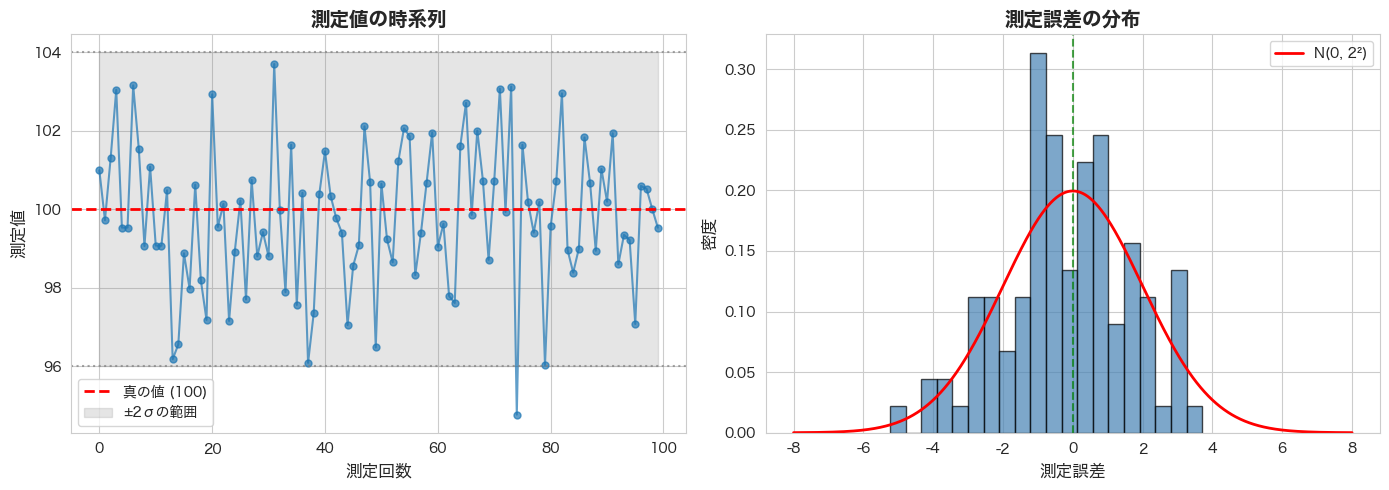

測定データの分析
真の値: 100
測定値の平均: 99.7923
測定値の標準偏差: 1.8072

95%信頼区間: [99.4381, 100.1465]


In [14]:
# ============================================================
# 正規分布の応用: 測定誤差のモデリング
# 測定誤差は通常、正規分布でモデル化されます
# ============================================================

np.random.seed(42)

# 真の値
true_value = 100

# 測定誤差の標準偏差
measurement_error_std = 2

# 100回の測定をシミュレーション
n_measurements = 100
measurements = true_value + np.random.normal(0, measurement_error_std, n_measurements)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 左: 測定値の時系列
axes[0].plot(range(n_measurements), measurements, 'o-', alpha=0.7, markersize=5)
axes[0].axhline(y=true_value, color='red', linestyle='--', linewidth=2, label=f'真の値 ({true_value})')
axes[0].axhline(y=true_value + 2*measurement_error_std, color='gray', linestyle=':', alpha=0.7)
axes[0].axhline(y=true_value - 2*measurement_error_std, color='gray', linestyle=':', alpha=0.7)
axes[0].fill_between(range(n_measurements), 
                     true_value - 2*measurement_error_std, 
                     true_value + 2*measurement_error_std, 
                     alpha=0.2, color='gray', label='±2σの範囲')
axes[0].set_xlabel('測定回数', fontsize=12)
axes[0].set_ylabel('測定値', fontsize=12)
axes[0].set_title('測定値の時系列', fontsize=14, fontweight='bold')
axes[0].legend()

# 右: 測定誤差の分布
errors = measurements - true_value
axes[1].hist(errors, bins=20, density=True, alpha=0.7, color='steelblue', edgecolor='black')
x = np.linspace(-8, 8, 1000)
axes[1].plot(x, stats.norm.pdf(x, 0, measurement_error_std), 'r-', linewidth=2, 
             label=f'N(0, {measurement_error_std}²)')
axes[1].axvline(x=0, color='green', linestyle='--', alpha=0.7)
axes[1].set_xlabel('測定誤差', fontsize=12)
axes[1].set_ylabel('密度', fontsize=12)
axes[1].set_title('測定誤差の分布', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# 統計量
print("="*60)
print("測定データの分析")
print("="*60)
print(f"真の値: {true_value}")
print(f"測定値の平均: {np.mean(measurements):.4f}")
print(f"測定値の標準偏差: {np.std(measurements):.4f}")
print(f"\n95%信頼区間: [{np.mean(measurements) - 1.96*np.std(measurements)/np.sqrt(n_measurements):.4f}, "
      f"{np.mean(measurements) + 1.96*np.std(measurements)/np.sqrt(n_measurements):.4f}]")

---

## まとめ

### 🎯 このノートブックで学んだこと

**確率の基礎**
- ✓ 確率変数は、ランダムな現象を数値で表したもの
- ✓ 離散型と連続型の確率分布がある
- ✓ 連続型では確率密度関数（PDF）を使う

**期待値と分散**
- ✓ 期待値は分布の「中心」を表す
- ✓ 分散は分布の「ばらつき」を表す
- ✓ 標準偏差は分散の平方根

**正規分布**
- ✓ 確率密度関数: $p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$
- ✓ パラメータは平均 $\mu$ と分散 $\sigma^2$
- ✓ 68-95-99.7ルール（±1σ, ±2σ, ±3σの範囲）

**中心極限定理**
- ✓ 独立な確率変数の和は正規分布に近づく
- ✓ 元の分布の形に関係なく成り立つ
- ✓ 多くの自然現象が正規分布に従う理由

### 📊 正規分布のチートシート

| 項目 | 説明 |
|------|------|
| 表記 | $\mathcal{N}(\mu, \sigma^2)$ |
| 平均 | $\mu$ |
| 分散 | $\sigma^2$ |
| PDF | $\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$ |
| 68%範囲 | $[\mu - \sigma, \mu + \sigma]$ |
| 95%範囲 | $[\mu - 1.96\sigma, \mu + 1.96\sigma]$ |

### 🔧 Pythonでの使い方

```python
import numpy as np
from scipy import stats

# サンプリング
samples = np.random.normal(mu, sigma, size=n)

# scipyを使う場合
dist = stats.norm(loc=mu, scale=sigma)
samples = dist.rvs(size=n)  # サンプリング
pdf_val = dist.pdf(x)       # 確率密度
cdf_val = dist.cdf(x)       # 累積確率
```

---

### ⚠️ よくあるエラー

#### エラー #1: 分散と標準偏差の混同

```python
# ❌ 間違い: 分散を標準偏差として使用
samples = np.random.normal(0, variance, 100)  # varianceは分散

# ✅ 正しい: np.random.normalは標準偏差を取る
samples = np.random.normal(0, np.sqrt(variance), 100)
# または
samples = np.random.normal(0, std_dev, 100)  # std_devは標準偏差
```

#### エラー #2: 確率密度を確率として解釈

連続分布では、特定の点での確率密度は**確率ではありません**。
確率は区間に対して定義されます。

```python
# ❌ 間違い: 「x=0での確率」という表現
prob = stats.norm.pdf(0, 0, 1)  # これは確率密度、確率ではない

# ✅ 正しい: 区間での確率を計算
prob = stats.norm.cdf(0.5, 0, 1) - stats.norm.cdf(-0.5, 0, 1)  # P(-0.5 ≤ X ≤ 0.5)
```

---

## 🎓 自己評価クイズ

学習内容を確認しましょう！すぐに答えを見ずに、まず自分で考えてみてください。

### Q1: 正規分布 N(100, 25) において、標準偏差はいくつですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 5

N(μ, σ²) の表記では、2番目のパラメータは**分散**です。
したがって、σ² = 25 なので、σ = √25 = 5 です。

</details>

---

### Q2: 中心極限定理が成り立つために必要な条件は何ですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 独立で同一の分布に従う確率変数であること（i.i.d.条件）

元の分布が正規分布である必要はありません。指数分布、一様分布、ポアソン分布など、
どんな分布でも、その和（または平均）は正規分布に近づきます。

</details>

---

### Q3: 標準正規分布 N(0, 1) から得たサンプルが、-2 から 2 の範囲に入る確率は約何%ですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 約95%（正確には95.45%）

68-95-99.7ルールにより、±2σの範囲には約95%のデータが含まれます。
標準正規分布ではσ=1なので、-2から2の範囲は±2σに相当します。

</details>

---

### Q4: 確率密度関数の値が1を超えることはありますか？

<details>
<summary>💡 答えを見る</summary>

**答え**: はい、超えることがあります

確率密度は確率ではないため、1を超えることがあります。
重要なのは、全区間での積分が1になることです。

例えば、N(0, 0.1²) の x=0 での確率密度は約4.0です。

```python
from scipy import stats
print(stats.norm.pdf(0, 0, 0.1))  # 約 3.99
```

</details>

---

### Q5: なぜ拡散モデルでは正規分布が使われるのですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 以下の理由があります

1. **数学的扱いやすさ**: 正規分布同士の積や和も正規分布になる（閉じた形式）
2. **中心極限定理**: 多くのステップでノイズを加えると、最終的に正規分布に収束
3. **サンプリングの容易さ**: 効率的にサンプルを生成できる
4. **微分可能性**: パラメータに対して微分でき、勾配降下法で学習可能

</details>

---

### 📚 練習問題

1. **正規分布のサンプリング**: 平均50、標準偏差10の正規分布から1000サンプルを生成し、そのうち何%が30から70の範囲に入るか確認してください。理論値と比較してみましょう。

2. **中心極限定理の実験**: コイン投げ（0または1）を100回行い、その合計を計算することを10000回繰り返してください。合計の分布をヒストグラムで可視化し、正規分布と比較してください。

3. **異なる分布の比較**: 同じ平均と分散を持つ正規分布、一様分布、三角分布からそれぞれサンプリングし、分布の形状の違いを可視化してください。

---

### ✅ 学習チェックリスト

- [ ] 確率変数と確率分布の違いを説明できる
- [ ] 正規分布のパラメータ（μ, σ）の意味を理解している
- [ ] 68-95-99.7ルールを暗記している
- [ ] 中心極限定理を自分の言葉で説明できる
- [ ] scipy.statsを使って正規分布の計算ができる

---

**次のステップ**: Notebook 31で、**最尤推定と生成モデルの基礎**を学びます！

生成モデルとは何か、そしてデータから確率分布のパラメータを推定する方法（最尤推定）を学習します。